# Analysis of energy data

## Getting Started

First download pickle file from GCP storage bucket.  The structure is indexed
on interval_date and each column is an array of 48 values, each value representing
each half hour starting at midnight.

In [93]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from more_itertools import flatten
from google.cloud import storage
from workalendar.oceania.australia import Victoria as VicHolidayCalendar
from datetime import datetime

GCP_STORAGE_BUCKET_ID = os.environ.get(
    'GCP_STORAGE_BUCKET_ID', 'GCP_STORAGE_BUCKET_ID not set.')
NMI = os.environ.get(
    'NMI', 'NMI not set.')

STORAGE_CLIENT = storage.Client()
bucket = STORAGE_CLIENT.get_bucket(GCP_STORAGE_BUCKET_ID)
pkl_file_name = f"dailies_{NMI}.pkl"
blob = storage.Blob(pkl_file_name, bucket)
pkl_file_path = f"/tmp/{pkl_file_name}"

with open(pkl_file_path, 'wb') as pkl_file:
    STORAGE_CLIENT.download_blob_to_file(blob, pkl_file)

df = pd.read_pickle(pkl_file_path)
os.remove(pkl_file_path)
df

,meter_consumptions_kwh,meter_generations_kwh,solar_generations_kwh,solar_mean_powrs_kw,solar_devices_reportings,capacities_kw,charge_quantities_kwh,deterioration_states_pct,discharge_quantities_kwh,power_at_charges_kw,residual_capacities_pct,total_charge_quantities_kwh,total_discharge_quantities_kwh
2014-11-26 00:00:00+00:00,"[0.194, 0.188, 0.225, 0.263, 0.181, 0.175, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2014-11-27 00:00:00+00:00,"[0.256, 0.244, 0.144, 0.163, 0.144, 0.15, 0.15...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2014-11-28 00:00:00+00:00,"[0.313, 0.425, 0.319, 0.194, 0.169, 0.163, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2014-11-29 00:00:00+00:00,"[0.225, 0.212, 0.206, 0.231, 0.2, 0.163, 0.169...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2014-11-30 00:00:00+00:00,"[0.769, 0.713, 0.163, 0.169, 0.156, 0.169, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-18 00:00:00+00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[

## Preparing the data

Nested arrays in a dataframe are a bit difficult to use, let's
unnest them into 48 rows of values.

In [94]:
meter_cons = np.array(df['meter_consumptions_kwh'].values.tolist())
meter_gens = np.array(df['meter_generations_kwh'].values.tolist())
solar_gens = np.array(df['solar_generations_kwh'].values.tolist())
solar_powrs = np.array(df['solar_mean_powrs_kw'].values.tolist())
solar_devices = np.array(df['solar_devices_reportings'].values.tolist())
capacities = np.array(df['capacities_kw'].values.tolist())
charge_quantities = np.array(df['charge_quantities_kwh'].values.tolist())
deterioration_states = np.array(df['deterioration_states_pct'].values.tolist())
discharge_quantities = np.array(df['discharge_quantities_kwh'].values.tolist())
power_at_charges = np.array(df['power_at_charges_kw'].values.tolist())
residual_capacities = np.array(df['residual_capacities_pct'].values.tolist())
total_charge_quantities = np.array(df['total_charge_quantities_kwh'].values.tolist())
total_discharge_quantities = np.array(df['total_discharge_quantities_kwh'].values.tolist())
interval_dates = np.repeat(df.index.tolist(), meter_cons.shape[1])

numeric_columns = ('meter_consumption_kwh', 'meter_generation_kwh',
            'solar_generation_kwh', 'solar_mean_powr_kw', 'solar_devices_reporting',
            'capacitie_kw', 'charge_quantity_kwh', 'deterioration_state_pct',
            'discharge_quantity_kwh', 'power_at_charge_kw', 'residual_capacity_pct',
            'total_charge_quantity_kwh', 'total_discharge_quantity_kwh'
            )

columns = ('interval_date',) + numeric_columns

df_energy = pd.DataFrame(np.column_stack((
    interval_dates, 
    meter_cons.ravel(),
    meter_gens.ravel(),
    solar_gens.ravel(),
    solar_powrs.ravel(),
    solar_devices.ravel(),
    capacities.ravel(),
    charge_quantities.ravel(),
    deterioration_states.ravel(),
    discharge_quantities.ravel(),
    power_at_charges.ravel(),
    residual_capacities.ravel(),
    total_charge_quantities.ravel(),
    total_discharge_quantities.ravel(),
    )),
    columns=columns,
)
df_energy.reset_index(inplace=True)
df_energy.rename(columns={'index':'interval'}, inplace=True)
df_energy['interval'] = (df_energy['interval'] % 48) + 1
df_energy.set_index('interval_date', inplace=True)

for nc in numeric_columns:
    df_energy[nc] = pd.to_numeric(df_energy[nc])

df_energy


,interval,meter_consumption_kwh,meter_generation_kwh,solar_generation_kwh,solar_mean_powr_kw,solar_devices_reporting,capacitie_kw,charge_quantity_kwh,deterioration_state_pct,discharge_quantity_kwh,power_at_charge_kw,residual_capacity_pct,total_charge_quantity_kwh,total_discharge_quantity_kwh
interval_date,,,,,,,,,,,,,,
2014-11-26 00:00:00+00:00,1,0.194,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000,0.00,0.0,0.000,0.000
2014-11-26 00:00:00+00:00,2,0.188,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000,0.00,0.0,0.000,0.000
2014-11-26 00:00:00+00:00,3,0.225,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000,0.00,0.0,0.000,0.000
2014-11-26 00:00:00+00:00,4,0.263,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000,0.00,0.0,0.000,0.000
2014-11-26 00:00:00+00:00,5,0.181,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000,0.00,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-22 00:00:00+00:00,44,0.000,0.0,0.0,0.0,0.0,6.72,0.000,0.8,0.408,-0.26,0.0,7386.075,7451.711
2020-04-22 00:00:00+00:00,45,0.000,0.0,0.0,0.0,0.0,6.72,0.005,0.8,0.147,0.00,0.0,7386.075,7451.711
2020-04-22 00:00:00+00:00,46,0.000,0.0,0.0,0.0,0.0,6.72,0.000,0.8,0.000,0.00,0.0,7386.075,7451.711


We can now derive new data based on existing raw data in dataframe.

### Gross Usage

Gross usage is what the usage would be as measured by the meter if no solar nor battery exists.
This provides a good baseline to compare how the household uses energy.

`meter_consumption_kwh + (solar_generation_kwh - meter_generation_kwh - charge_quantity_kwh) + discharge_quantity_kwh`


In [95]:
df_energy['gross_usage_kwh'] = df_energy['meter_consumption_kwh'] + (df_energy['solar_generation_kwh'] - df_energy['meter_generation_kwh'] - df_energy['charge_quantity_kwh']) + df_energy['discharge_quantity_kwh']
df_energy

,interval,meter_consumption_kwh,meter_generation_kwh,solar_generation_kwh,solar_mean_powr_kw,solar_devices_reporting,capacitie_kw,charge_quantity_kwh,deterioration_state_pct,discharge_quantity_kwh,power_at_charge_kw,residual_capacity_pct,total_charge_quantity_kwh,total_discharge_quantity_kwh,gross_usage_kwh
interval_date,,,,,,,,,,,,,,,
2014-11-26 00:00:00+00:00,1,0.194,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000,0.00,0.0,0.000,0.000,0.194
2014-11-26 00:00:00+00:00,2,0.188,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000,0.00,0.0,0.000,0.000,0.188
2014-11-26 00:00:00+00:00,3,0.225,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000,0.00,0.0,0.000,0.000,0.225
2014-11-26 00:00:00+00:00,4,0.263,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000,0.00,0.0,0.000,0.000,0.263
2014-11-26 00:00:00+00:00,5,0.181,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000,0.00,0.0,0.000,0.000,0.181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-22 00:00:00+00:00,44,0.000,0.0,0.0,0.0,0.0,6.72,0.000,0.8,0.408,-0.26,0.0,7386.075,7451.711,0.408
2020-04-22 00:00:00+00:00,45,0.000,0.0,0.0,0.0,0.0,6.72,0.005,0.8,0.147,0.00,0.0,7386.075,7451.711,0.142
2020-04-22 00:00:00+00:00,46,0.000,0.0,0.0,0.0,0.0,6.72,0.000,0.8,0.000,0.00,0.0,7386.075,7451.711,0.000


## Comparing Workdays and Non-workdays

Thank goodness for the Python library [Workalendar](https://peopledoc.github.io/workalendar/)
for maintaining a list of public holidays for G20 countries.  For Australia, it even
provides state specific holidays and handles make up days if holidays falls on a weekend.

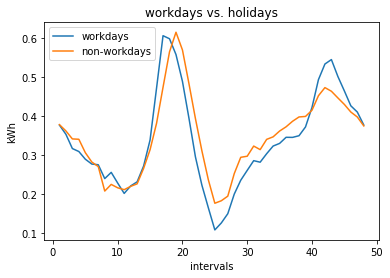

In [96]:
vic_cal = VicHolidayCalendar()
holidays = pd.to_datetime(list(flatten([[date for date, name in vic_cal.holidays(year)] for year in range(2000, datetime.now().year)])))
holidays_mask = df_energy.index.isin(holidays)
weekend_mask = df_energy.index.dayofweek.isin([5, 6])
non_workday_mask = holidays_mask | weekend_mask
df_non_workdays = df_energy.loc[non_workday_mask] 
df_workdays = df_energy.loc[~non_workday_mask] 

df_workdays_hh_mean = df_workdays.groupby(['interval']).agg(
    gross_usage_kwh=pd.NamedAgg(column='gross_usage_kwh', aggfunc='mean'),
)
df_non_workdays_hh_mean = df_non_workdays.groupby(['interval']).agg(
    gross_usage_kwh=pd.NamedAgg(column='gross_usage_kwh', aggfunc='mean'),
)

title = 'workdays vs. holidays'
x = np.linspace(1, 48, num=48)
fig, axes = plt.subplots()
axes.plot(x, df_workdays_hh_mean['gross_usage_kwh'], label='workdays')
axes.plot(x, df_non_workdays_hh_mean['gross_usage_kwh'], label='non-workdays')
axes.set_xlabel('intervals')
axes.set_ylabel('kWh')
axes.set_title(title)
axes.legend()



## Comparing seasons

TODO


## Comparing different event periods

Here, we define the periods we want to compare and create list of event periods (date ranges) as plot data.



In [97]:
periods = [
    {'name': 'Epoch', 'actual_start': '2014-11-26', 'actual_end': '2015-04-06'},
    {'name': 'Installed Solar 3 kW', 'actual_start': '2015-04-07', 'actual_end': '2016-08-14'},
    {'name': 'Installed Battery 8 kW', 'actual_start': '2016-08-14', 'actual_end': '2016-10-17'},
    {'name': 'Upgraded to Solar 6 kW', 'actual_start': '2016-10-18', 'actual_end': '2019-11-30'},
    {'name': 'Purchased EV', 'actual_start': '2019-12-01', 'actual_end': '2020-03-22'},
    {'name': 'Red EV Plan', 'actual_start': '2020-03-23', 'actual_end': '2020-12-31'},
]

periods_data = []

for p in periods:
    period_data = {**p}
    date_mask = (df_energy.index >= p.get('actual_start')) & (df_energy.index <= p.get('actual_end'))
    df_period = df_energy.loc[date_mask]
    df_hh_mean = df_period.groupby(['interval']).agg(
        meter_consumptions_kwh=pd.NamedAgg(
            column='meter_consumption_kwh', aggfunc='mean'),
        meter_generations_kwh=pd.NamedAgg(
            column='meter_generation_kwh', aggfunc='mean'),
        solar_generations_kwh=pd.NamedAgg(column='solar_generation_kwh', aggfunc='mean'),
        charge_quantity_kwh=pd.NamedAgg(column='charge_quantity_kwh', aggfunc='mean'),
        discharge_quantity_kwh=pd.NamedAgg(column='discharge_quantity_kwh', aggfunc='mean'),
        gross_usage_kwh=pd.NamedAgg(column='gross_usage_kwh', aggfunc='mean'),
    )
    period_data['df_hh_mean'] = df_hh_mean
    periods_data.append(period_data)


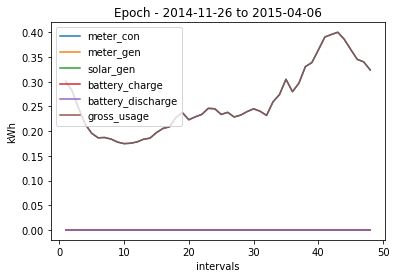

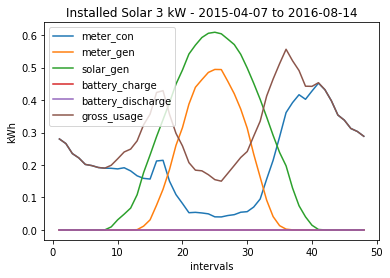

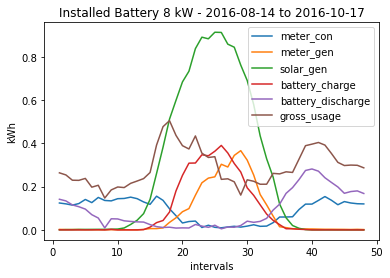

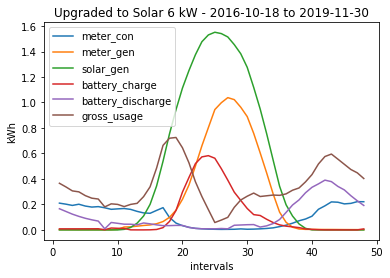

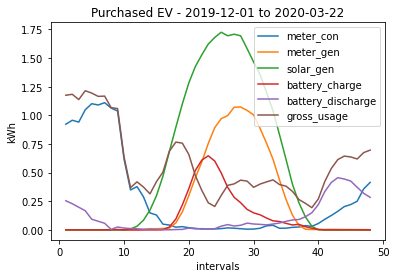

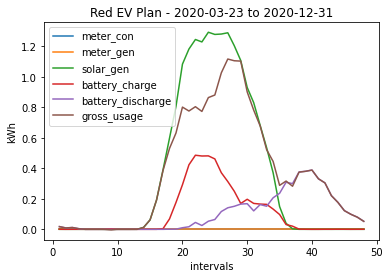

In [98]:
for period_data in periods_data:
    title = f"{period_data.get('name')} - {period_data.get('actual_start')} to {period_data.get('actual_end')}"
    df_hh_mean = period_data['df_hh_mean']
    x = np.linspace(1, 48, num=48)
    fig, axes = plt.subplots()
    axes.plot(x, df_hh_mean['meter_consumptions_kwh'], label='meter_con')
    axes.plot(x, df_hh_mean['meter_generations_kwh'], label='meter_gen')
    axes.plot(x, df_hh_mean['solar_generations_kwh'], label='solar_gen')
    axes.plot(x, df_hh_mean['charge_quantity_kwh'], label='battery_charge')
    axes.plot(x, df_hh_mean['discharge_quantity_kwh'], label='battery_discharge')
    axes.plot(x, df_hh_mean['gross_usage_kwh'], label='gross_usage')
    axes.set_xlabel('intervals')
    axes.set_ylabel('kWh')
    axes.set_title(title)
    axes.legend()
